# Week 4: NLP Disaster Tweets Kaggle Mini-Project

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras import layers

## Brief description of the problem and data (5 pts)

*Briefly describe the challenge problem and NLP. Describe the size, dimension, structure, etc., of the data.*

## Exploratory Data Analysis (EDA) — Inspect, Visualize and Clean the Data (15 pts)

*Show a few visualizations like histograms. Describe any data cleaning procedures. Based on your EDA, what is your plan of analysis?*


**************************************** Train dataset ****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          7613 non-null   int64 
 1   keyword     7552 non-null   object
 2   location    5080 non-null   object
 3   text        7613 non-null   object
 4   target      7613 non-null   int64 
 5   word_count  7613 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 357.0+ KB

    id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   

   target  word_count  
0       1          13  
1       1           7  
2       1          22  

          id keyw

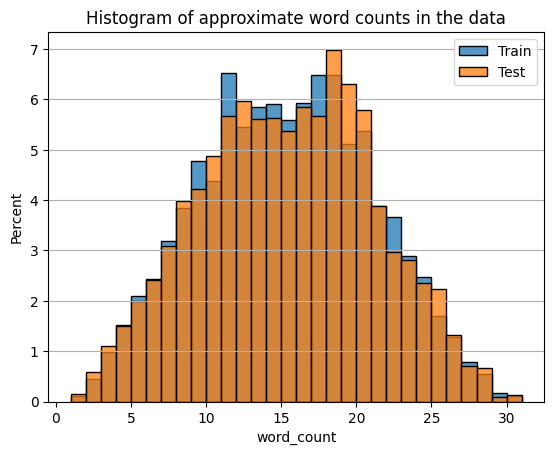

In [28]:
def count_words(df):
    for i, row in df.iterrows():
        df.loc[i, 'word_count'] = len(row.text.split())
    df['word_count'] = df['word_count'].astype(int)
    all_text = ' '.join(df.text)
    unique_words = len(set(all_text.split()))
    return unique_words

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

train_unique_words = count_words(train_df)
test_unique_words = count_words(test_df)


print('\n' + 40*'*' + ' Train dataset ' + 40*'*')
train_df.info()
print('\n', train_df.head(3))
print('\n', train_df.tail(3))
print('\n', 'Number of duplicated texts:', np.sum(train_df.duplicated(subset='text')))
print('\n', 'Longest tweet has', np.max(train_df.word_count), 'words.')
print('\n', 'Unique words in the dataset:', train_unique_words)

print('\n' + 40*'*' + ' Test dataset ' + 40*'*')
(test_df.info())
print('\n', test_df.head(3))
print('\n', test_df.tail(3))
print('Number of duplicated texts:', np.sum(test_df.duplicated(subset='text')))
print('\n', 'Longest tweet has', np.max(test_df.word_count), 'words.')
print('\n', 'Unique words in the dataset:', test_unique_words)


sns.histplot(train_df, x='word_count', bins=30, stat='percent')
sns.histplot(test_df, x='word_count', bins=30, stat='percent')
plt.grid(axis='y')
plt.title('Histogram of approximate word counts in the data')
plt.legend(['Train','Test'])
plt.show()

## Model Architecture (25 pts)

*Describe your model architecture and reasoning for why you believe that specific architecture would be suitable for this problem.*

*Since we did not learn NLP-specific techniques such as word embeddings in the lectures, we recommend looking at Kaggle tutorials, discussion boards, and code examples posted for this challenge.  You can use any resources needed, but make sure you “demonstrate” you understood by including explanations in your own words. Also importantly, please have a reference list at the end of the report.*

*There are many methods to process texts to matrix form (word embedding), including TF-IDF, GloVe, Word2Vec, etc. Pick a strategy and process the raw texts to word embedding. Briefly explain the method(s) and how they work in your own words.*

*Build and train your sequential neural network model (You may use any RNN family neural network, including advanced architectures LSTM, GRU, bidirectional RNN, etc.).*

In [ ]:
maxlen = 200

# Input for variable-length sequences of integers
inputs = keras.Input(shape=(None,), dtype="int32")
# Embed each integer in a 128-dimensional vector
x = layers.Embedding(max_features, 128)(inputs)
# Add 2 bidirectional LSTMs
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
# Add a classifier
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.summary()

## Results and Analysis (35 pts)

*Run hyperparameter tuning, try different architectures for comparison, apply techniques to improve training or performance, and discuss what helped.*

*Includes results with tables and figures. There is an analysis of why or why not something worked well, troubleshooting, and a hyperparameter optimization procedure summary.*



## Conclusion (15 pts)

*Discuss and interpret results as well as learnings and takeaways. What did and did not help improve the performance of your models? What improvements could you try in the future?*



# Sources
https://keras.io/examples/nlp/bidirectional_lstm_imdb/
